- [x] Analyze the age distribution of customers, and identify any trends or patterns in spending behavior, credit limit, and utilization ratio across different age groups.
- [x] Explore differences in spending patterns, credit limits, and utilization ratios between male and female customers.
- [ ] Investigate if the number of dependents influences spending behavior, credit limit, and utilization ratio.
- [ ] Determine if there's a relationship between customers' education levels and their spending behavior, credit limit, and utilization ratio.
- [ ] Assess if marital status has an impact on spending patterns, credit limits, and utilization ratios.
- [ ] Examine how income levels affect spending behavior, credit limit, and utilization ratio.
- [ ] Investigate if card types are associated with specific demographic segments, and how they may influence spending behavior, credit limit, and utilization ratio.

Consider visualizations such as bar charts, pie charts, or histograms to present the data and reveal trends within each demographic segment.


In [12]:
import sys
!conda install --yes --quiet --prefix {sys.prefix} \
numpy \
pandas \
matplotlib \
seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Plotting functions

In [30]:
fig_size = lambda param: param if param else (4, 2)

def scatterplot(df, x, y, size=None):
    plt.figure(figsize=fig_size(size))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'{x} vs. {y}')
    plt.show()
    
def boxplot(df, x, y, size=None):
    plt.figure(figsize=fig_size(size))
    sns.boxplot(x=x, y=y, data=df)
    plt.title(f'{y} by {x}')
    plt.show()

def histplot(df, x, hue=None, size=None):
    plt.figure(figsize=fig_size(size))
    sns.histplot(data=df, x=x, hue=hue, element='step', fill=True)
    plt.title(f'Histogram of {x}')
    plt.xlabel(x)
    plt.ylabel('Num of samples')
    plt.show()

def density_plot(df, x, hue=None, size=None):
    plt.figure(figsize=fig_size(size))
    sns.kdeplot(data=df, x=x, hue=hue, shade=True, alpha=0.8)
    plt.title(f'Distribution of {x} by {hue}')
    plt.xlabel(x)
    plt.ylabel('Density')
    plt.show()
    
def pie_chart(data, labels, size=None):
    plt.figure(figsize=fig_size(size))
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

## Assumptions

Certain parts of the data or given feature descriptions might be vague, that's why it is necessary to clarify them. Since this is a non-commercial project, I will make assumptions I will base my the analysis upon. In comemrcial environment those will be clarified by an SME or a business.

# Data Exploration

In [15]:
# load the dataset (download it beforehand)
df = pd.read_csv('./data/BankChurners.csv')

In [16]:
# standardize column names & remove unnecessary columns
column_renames = {
    'CLIENTNUM': 'client_id',
    'Attrition_Flag': 'churn_status',
    'Customer_Age': 'age',
    'Gender': 'gender',
    'Dependent_count': 'dependents',
    'Education_Level': 'education_level',
    'Marital_Status': 'marital_status',
    'Income_Category': 'income_category',
    'Card_Category': 'card_category',
    'Months_on_book': 'months_on_book',
    'Total_Relationship_Count': 'total_relationships',
    'Months_Inactive_12_mon': 'months_inactive',
    'Contacts_Count_12_mon': 'contacts',
    'Credit_Limit': 'credit_limit',
    'Total_Revolving_Bal': 'revolving_balance',
    'Avg_Open_To_Buy': 'available_credit',
    'Total_Amt_Chng_Q4_Q1': 'change_in_purchase_amt',
    'Total_Trans_Amt': 'total_purchase_amt',
    'Total_Trans_Ct': 'total_purchase_ct',
    'Total_Ct_Chng_Q4_Q1': 'change_in_purchase_ct',
    'Avg_Utilization_Ratio': 'credit_utilization',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'naive_bayes_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'naive_bayes_2'
}

needed_columns = ['age', 'gender', 'credit_limit', 'total_purchase_amt', 'credit_utilization']

df = df.rename(columns=column_renames)
df = df[needed_columns]
df.columns

Index(['age', 'gender', 'credit_limit', 'total_purchase_amt',
       'credit_utilization'],
      dtype='object')

## 1 Age Feature

### 1.1 Objectives: 

(1.2) Analyze the age distribution of customers, \
(1.3) and identify any trends or patterns in: \
(1.3.1) spending behavior \
(1.3.2) credit limit \
(1.3.3) utilization ratio across different age groups

In [17]:
print("Min age: ", df['age'].min())
print("Max age: ", df['age'].max())

Min age:  26
Max age:  73


In [18]:
# age groups are defined by [min_age, start_middle_age, start_retirement_age, max_age]
bins = [26, 35, 60, 73]
labels = ['26-35', '36-60', '60-73']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

### 1.2 Analyze Age Distribution

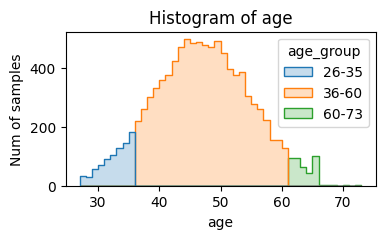

In [31]:
# plot the age distribution using histogram for distinct values
# apply age_group hue (semantic segmentation) onto the histogram
histplot(df=df, x='age', hue='age_group')

In [20]:
df['age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: age, dtype: float64

### 1.3 Trends & Patterns

#### 1.3.1 Spending Behavior

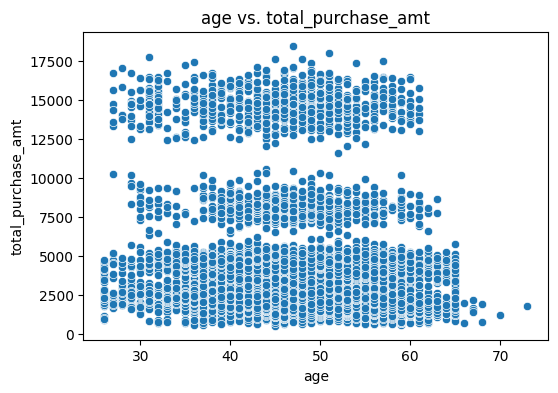

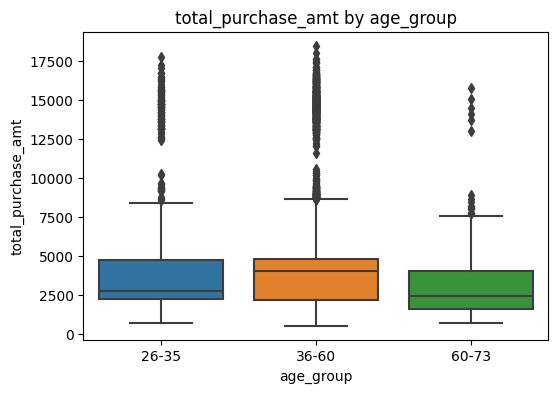

In [48]:
# density_plot(df=df, x='total_purchase_amt', hue='age_group')

# scatter plot: correlation between age and spending behavior
scatterplot(x='age', y='total_purchase_amt', df=df, size=(6, 4))

# Boxplot: outliers or significant differences in spending behavior between age groups
boxplot(x='age_group', y='total_purchase_amt', df=df, size=(6, 4))

#### 1.3.2 Credit Limit

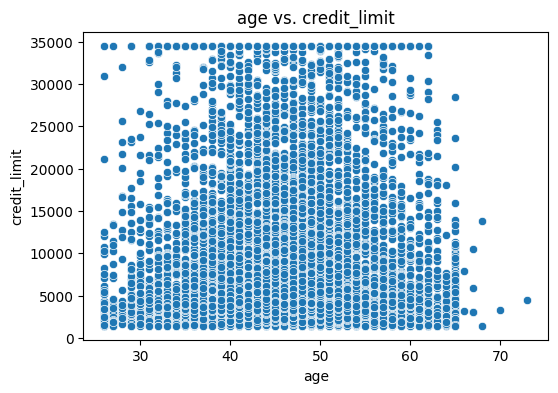

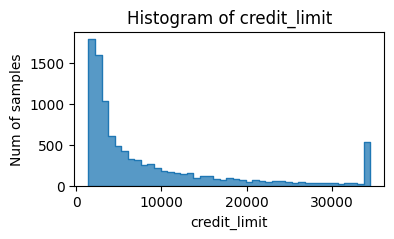

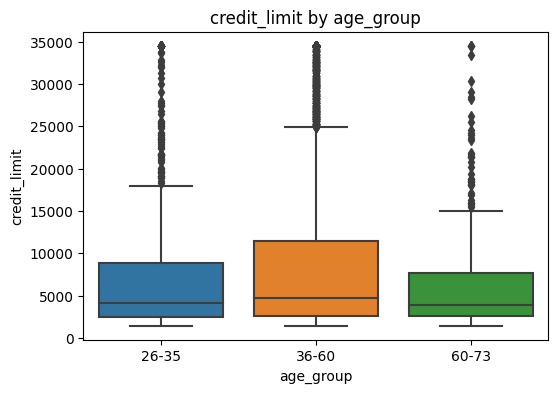

In [43]:
# correlation between age and credit_limit
scatterplot(x='age', y='credit_limit', df=df, size=(6, 4))

# distribution of credit limits across all customers
histplot(df=df, x='credit_limit')

# outliers or significant differences in credit limit between age groups
# use df.loc[df['credit_limit'] < X] to slice the data, where X is the cut-off
boxplot(df=df, x='age_group', y='credit_limit', size=(6, 4))

#### 1.3.3 Utilization Ratio

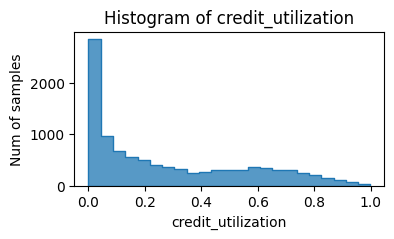

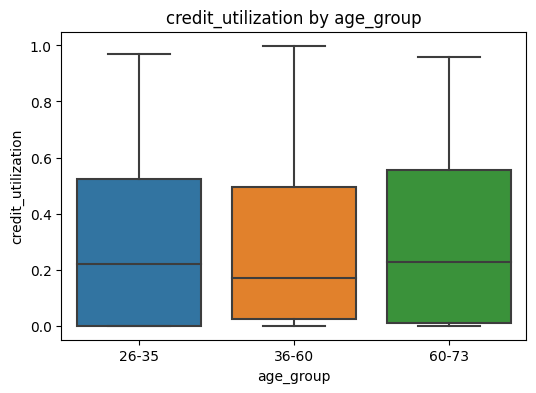

In [46]:
# correlation between age and credit_limit
# scatterplot(x='age', y='credit_utilization', df=df, size=(12, 8))

# distribution of credit limits across all customers
histplot(df=df, x='credit_utilization')

# outliers or significant differences in credit limit between age groups
# use df.loc[df['credit_limit'] < X] to slice the data, where X is the cut-off
boxplot(df=df, x='age_group', y='credit_utilization', size=(6, 4))

### 1.4 Early Insights

#### 1.4.1 Total Spending Amount

1. Correlation between age and spending behavior creates 3 dense clusters.
2. 2 upper clusters along the Y axes are the outliers.

TOANSWER:
Questions:

TODO:
1. [ ] Examine other features: Check if there are other features that may explain the clustering, such as income, customer segment, or product preferences.

2. [ ] Use clustering algorithms: Apply unsupervised learning techniques (e.g., k-means, hierarchical clustering) to find patterns or segment the data.

3. [ ] Analyze clusters: Profile each cluster based on demographic, behavioral, or other relevant features to understand their characteristics.

4. [ ] Validate findings: If possible, cross-check your findings with domain knowledge or consult experts to confirm if the discovered patterns make sense.

5. [ ] Monitor over time: Investigate if these clusters persist or change over time, which could help identify trends or shifts in customer behavior.


## 2 Gender Feature

### 2.1 Objectives
(2.2) Explore differences in:
(2.2.1)spending patterns
(2.2.2) credit limits
(2.2.3) and utilization ratios between male and female customers

In [ ]:
# Filter the data to include only male and female customers
print("Genders: ", list(df['gender'].unique()))
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

# Compare spending patterns between male and female customers
male_spending = male_df['total_purchase_amt']
female_spending = female_df['total_purchase_amt']

print('Male spending stats:\n', male_spending.describe())
print()
print('Female spending stats:\n', female_spending.describe())

In [ ]:
# Visualize differences in spending patterns between male and female customers
sns.histplot(data=male_df, x='total_purchase_amt', color='blue', alpha=0.5, label='Male')
sns.histplot(data=female_df, x='total_purchase_amt', color='red', alpha=0.5, label='Female')
plt.legend()
plt.show()

In [ ]:
# Compare credit limits between male and female customers
male_credit_limit = male_df['credit_limit']
female_credit_limit = female_df['credit_limit']

print('Male credit limit stats:\n', male_credit_limit.describe())
print('Female credit limit stats:\n', female_credit_limit.describe())

In [ ]:
# Visualize differences in credit limits between male and female customers
density_plot(df=df, x='credit_limit', hue='gender')

sns.boxplot(data=[male_credit_limit, female_credit_limit], palette=['blue', 'red'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Limit')
plt.show()

In [ ]:
# Compare utilization ratios between male and female customers
male_utilization = male_df['credit_utilization']
female_utilization = female_df['credit_utilization']

print('Male utilization stats:\n', male_utilization.describe())
print('Female utilization stats:\n', female_utilization.describe())

In [ ]:
# Visualize differences in utilization ratios between male and female customers
density_plot(df=df, x='credit_utilization', hue='gender')

sns.boxplot(data=[male_utilization, female_utilization], palette=['blue', 'red'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Utilization Ratio')
plt.show()

## Data Cleaning and Preprocessing

## Modelling

## Results and Interpretation

## Conclusions